## 1. 파이토치의 nn.Linear와 nn.Sigmoid로 로지스틱 회귀 구현하기

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [10]:
torch.manual_seed(1)

In [11]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

```nn.Sequential()```은 ```nn.Module```층을 차례로 쌓을 수 있도록 한다. 뒤에서 이를 이용해서 인공 신경망을 구현하게 되므로 기억하면 좋다. 쉽게 말해서 nn.Sequential()은 Wx + b와 같은 수식과 시그모이드 함수 등과 같은 여러 함수들을 연결해주는 역할을 한다. 이를 통해 로지스틱 회귀를 구현해본다.

In [12]:
model = nn.Sequential(
    nn.Linear(2, 1),
    nn.Sigmoid()
)

현재 W와 b는 랜덤 초기화가 된 상태다


In [13]:
model(x_train)

tensor([[0.4020],
        [0.4147],
        [0.6556],
        [0.5948],
        [0.6788],
        [0.8061]], grad_fn=<SigmoidBackward>)

6 x 1 크기의 예측값 텐서가 출력된다. 그러나 현재 W와 b는 임의의 값을 가지므로 현재의 예측은 의미가 없다.<br>
이제 경사 하강법을 사용하여 훈련해본다.

In [14]:
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
    
    # H(x) 계산
    hypothesis = model(x_train)
    
    # cost 계산
    cost = F.binary_cross_entropy(hypothesis, y_train)
    
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 20번 마다 로그 출력
    if epoch % 20 ==0:
        prediction = hypothesis >= torch.FloatTensor([0.5])
        correct_prediction = prediction.float() == y_train
        accuracy = correct_prediction.sum().item() / len(correct_prediction)
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format(
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))

Epoch    0/1000 Cost: 0.539713 Accuracy 83.33%
Epoch   20/1000 Cost: 0.441875 Accuracy 66.67%
Epoch   40/1000 Cost: 0.316358 Accuracy 83.33%
Epoch   60/1000 Cost: 0.220498 Accuracy 100.00%
Epoch   80/1000 Cost: 0.157299 Accuracy 100.00%
Epoch  100/1000 Cost: 0.134272 Accuracy 100.00%
Epoch  120/1000 Cost: 0.118297 Accuracy 100.00%
Epoch  140/1000 Cost: 0.105779 Accuracy 100.00%
Epoch  160/1000 Cost: 0.095704 Accuracy 100.00%
Epoch  180/1000 Cost: 0.087420 Accuracy 100.00%
Epoch  200/1000 Cost: 0.080486 Accuracy 100.00%
Epoch  220/1000 Cost: 0.074595 Accuracy 100.00%
Epoch  240/1000 Cost: 0.069526 Accuracy 100.00%
Epoch  260/1000 Cost: 0.065118 Accuracy 100.00%
Epoch  280/1000 Cost: 0.061247 Accuracy 100.00%
Epoch  300/1000 Cost: 0.057820 Accuracy 100.00%
Epoch  320/1000 Cost: 0.054764 Accuracy 100.00%
Epoch  340/1000 Cost: 0.052022 Accuracy 100.00%
Epoch  360/1000 Cost: 0.049546 Accuracy 100.00%
Epoch  380/1000 Cost: 0.047299 Accuracy 100.00%
Epoch  400/1000 Cost: 0.045251 Accuracy 100

In [15]:
model(x_train)

tensor([[2.7616e-04],
        [3.1595e-02],
        [3.8959e-02],
        [9.5624e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward>)

In [16]:
print(list(model.parameters()))

[Parameter containing:
tensor([[3.2534, 1.5181]], requires_grad=True), Parameter containing:
tensor([-14.4839], requires_grad=True)]


## 2. 인공지능 신경망으로 표현하는 로지스틱 회귀
---
사실 로지스틱 회귀는 인공 신경망으로 간주할 수 있다.
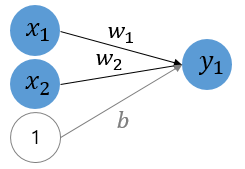
위의 인공 신경망 그림에서 각 화살표는 입력과 곱해지는 가중치 또는 편향이다. 각 입력에 대해서 검은색 화살표는 가중치, 회색 화살표는 편향에 곱해진다. 각 입력 x는 각 입력의 가중치 w와 곱해지고, 편향 b는 상수 1과 곱해지는 것으로 표현됐다. 그리고 출력하기 전에 시그모이드 함수를 지나게 된다. <br><br>
결과적으로 위의 인공 신경망은 다음과 같은 다중 로지스틱 회귀를 표현하고있다.<br>
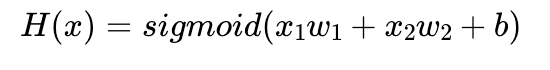